# Xarray example

Rainey Aberle

GEOS 505

4 October 2022

In [15]:
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import time

# path to GEOS505-fall2022
base_path = '/Users/raineyaberle/Courses/GEOS_505_ResearchComputing/GEOS505-fall2022/'
data_path = base_path + '../data/xarray_example/'

In [2]:
os.chdir(data_path)
data_fns = os.listdir()
data_fns

['agg_macav2metdata_pr_bcc-csm1-1_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc',
 'agg_macav2metdata_pr_CanESM2_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc',
 'agg_macav2metdata_pr_bcc-csm1-1-m_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc',
 'agg_macav2metdata_pr_CCSM4_r6i1p1_rcp85_2006_2099_CONUS_monthly.nc',
 'agg_macav2metdata_pr_BNU-ESM_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc']

In [3]:
cmip_fn = data_fns[3]
ds_pr = xr.open_dataset(cmip_fn)

mean_mon_precip = ds_pr['precipitation'].mean(dim=('lat', 'lon')).values

# plt.plot(mean_mon_precip)
# plt.show()
ds_pr

<xarray.Dataset>
Dimensions:        (time: 1128, lat: 49, lon: 73)
Coordinates:
  * time           (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat            (lat) float64 46.48 46.52 46.56 46.6 ... 48.4 48.44 48.48
  * lon            (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.5 245.5
Data variables:
    precipitation  (time, lat, lon) float32 114.4 104.6 91.68 ... 19.68 20.74
Attributes: (12/48)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326
    Conventions:                     CF-1.0
    History:                         Translated to CF-1.0 Conventions by Netc...

In [4]:
ds_pr.attrs

{'description': 'Multivariate Adaptive Constructed Analogs (MACA) method, version 2.3,Dec 2013.',
 'id': 'MACAv2-METDATA',
 'naming_authority': 'edu.uidaho.reacch',
 'Metadata_Conventions': 'Unidata Dataset Discovery v1.0',
 'Metadata_Link': '',
 'cdm_data_type': 'FLOAT',
 'title': 'Monthly aggregation of downscaled daily meteorological data of Monthly Precipitation Amount from University of Miami - RSMAS (CCSM4) using the run r6i1p1 of the rcp85 scenario.',
 'summary': 'This archive contains monthly downscaled meteorological and hydrological projections for the Conterminous United States at 1/24-deg resolution. These monthly values are obtained by aggregating the daily values obtained from the downscaling using the Multivariate Adaptive Constructed Analogs (MACA, Abatzoglou, 2012) statistical downscaling method with the METDATA (Abatzoglou,2013) training dataset. The downscaled meteorological variables are maximum/minimum temperature(tasmax/tasmin), maximum/minimum relative humidity (

In [12]:
# mean annual precip
# ds_pr['precipitation'].groupby('time.year').sum(dim='time').mean(dim='year').plot()

# mean monthly precip
# ds_pr['precipitation'].groupby('time.month').sum(dim='time').plot()

ax1 = ds_pr['precipitation'].mean(dim=('lat', 'lon')).plot()
# ax1.set_ylabel(
plt.show()

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

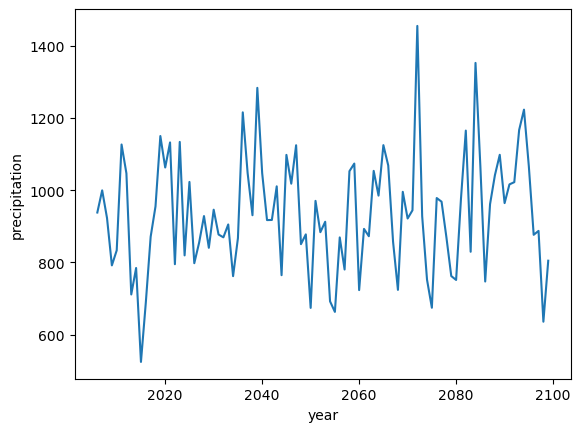

0.1169731616973877


In [16]:

t1 = time.time()
# annual precipitation averaged over the region
ds_pr['precipitation'].mean(dim=('lat', 'lon')).groupby('time.year').sum(dim='time').plot()
plt.show()

print(time.time() - t1)

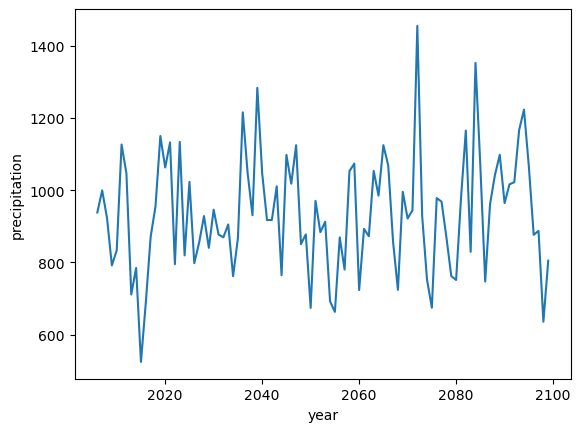

0.11860322952270508


In [17]:
t1 = time.time()

# try a different order of operations
ds_pr['precipitation'].groupby('time.year').sum(dim='time').mean(dim=('lat', 'lon')).plot()
plt.show()

print(time.time() - t1)

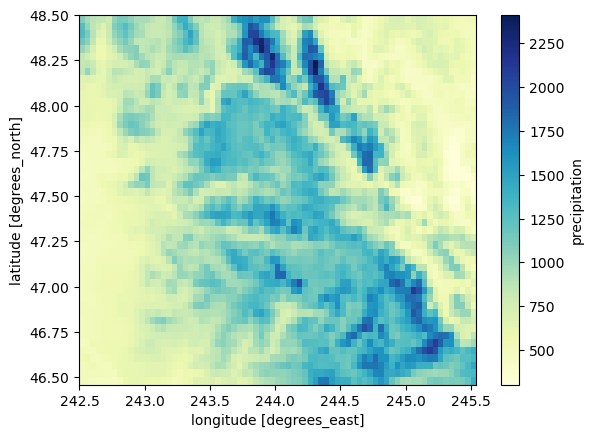

In [20]:
ds_pr['precipitation'].groupby('time.year').sum(dim='time').mean(dim='year').plot(cmap='YlGnBu')
plt.show()

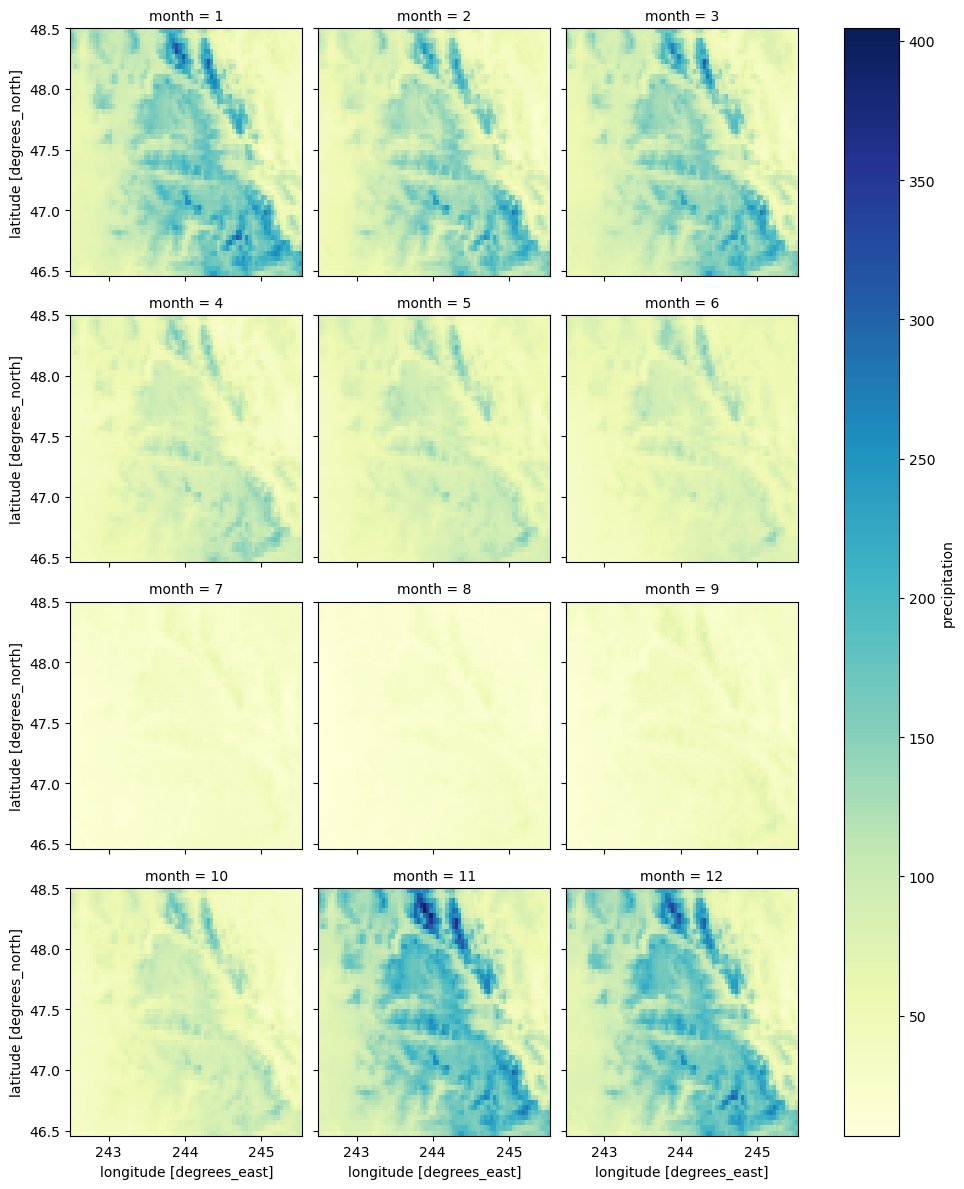

In [30]:
# look at seasonality
ds_pr['precipitation'].groupby('time.month').mean(dim=('time')).plot(col='month', col_wrap=3, cmap='YlGnBu')
plt.show()

In [31]:
ds_pr

<xarray.Dataset>
Dimensions:        (time: 1128, lat: 49, lon: 73)
Coordinates:
  * time           (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat            (lat) float64 46.48 46.52 46.56 46.6 ... 48.4 48.44 48.48
  * lon            (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.5 245.5
Data variables:
    precipitation  (time, lat, lon) float32 114.4 104.6 91.68 ... 19.68 20.74
Attributes: (12/48)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326
    Conventions:                     CF-1.0
    History:                         Translated to CF-1.0 Conventions by Netc...